# BigQuery-Geotab Intersection Congestion
## Can you predict wait times at major city intersections?

Driving is a means of travelling that is preferred by many people. We all want to drive efficiently and reach our destination with as little time stuck in a traffic jam as possible. The ability to predict traffic at intersections enables us to plan our course ahead of time and avoid busy streets and intersections. In this project, we attempt to train machine learning models to predict the time it takes to cross an intersection and how congested it is at an intersection.


### Objective:

The objective is to predict congestion, based on an aggregate measure of stopping distance and waiting times, at intersections in 4 major US cities: Atlanta, Boston, Chicago & Philadelphia.

### Data columns:

#### 1. Independent Variables (Features)
- IntersectionId: Represents a unique intersectionID for some intersection of roads within a city.
- Latitude: The latitude of the intersection.
- Longitude: The longitude of the intersection.
- EntryStreetName: The street name from which the vehicle entered towards the intersection.
- ExitStreetName: The street name to which the vehicle goes from the intersection.
- EntryHeading: Direction to which the car was heading while entering the intersection.
- ExitHeading: Direction to which the car went after it went through the intersection.
- Hour: The hour of the day.
- Weekend: It's weekend or not.
- Month: Which Month it is.
- Path: It is a concatination in the format: EntryStreetName_EntryHeading ExitStreetName_ExitHeading.
- City: Name of the city

#### 2. Dependent Variables (Targets)
- TotalTimeStopped_p20: Total time for which 20% of the vehicles had to stop at an intersection.
- TotalTimeStopped_p40: Total time for which 40% of the vehicles had to stop at an intersection.
- TotalTimeStopped_p50: Total time for which 50% of the vehicles had to stop at an intersection.
- TotalTimeStopped_p60: Total time for which 60% of the vehicles had to stop at an intersection.
- TotalTimeStopped_p80: Total time for which 80% of the vehicles had to stop at an intersection.
- TimeFromFirstStop_p20: Time taken for 20% of the vehicles to stop again after crossing a intersection.
- TimeFromFirstStop_p40: Time taken for 40% of the vehicles to stop again after crossing a intersection.
- TimeFromFirstStop_p50: Time taken for 50% of the vehicles to stop again after crossing a intersection.
- TimeFromFirstStop_p60: Time taken for 60% of the vehicles to stop again after crossing a intersection.
- TimeFromFirstStop_p80: Time taken for 80% of the vehicles to stop again after crossing a intersection.
- DistanceToFirstStop_p20: How far before the intersection the 20% of the vehicles stopped for the first time.
- DistanceToFirstStop_p40: How far before the intersection the 40% of the vehicles stopped for the first time.
- DistanceToFirstStop_p50: How far before the intersection the 50% of the vehicles stopped for the first time.
- DistanceToFirstStop_p60: How far before the intersection the 60% of the vehicles stopped for the first time.
- DistanceToFirstStop_p80: How far before the intersection the 80% of the vehicles stopped for the first time.

#### 3. Target Output (based on Competition's Rules)

Total time stopped at an intersection, 20th, 50th, 80th percentiles and Distance between the intersection and the first place the vehicle stopped and started waiting, 20th, 50th, 80th percentiles

- TotalTimeStopped_p20
- TotalTimeStopped_p50
- TotalTimeStopped_p80
- DistanceToFirstStop_p20
- DistanceToFirstStop_p50
- DistanceToFirstStop_p80

## 1. Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor, RegressorChain

In [2]:
import warnings 
warnings.simplefilter(action = "ignore")

In [3]:
# Reading Train & Test datasets
df_train = pd.read_csv('M6/train.csv')
df_test = pd.read_csv('M6/test.csv')

In [4]:
# display shape of the 2 datasets 
# Train dataset has 15 more columns than Test dataset and Test dataset has twice the number of observations
print ("shape of train dataset :", df_train.shape)
print ("shape of test dataset :", df_test.shape)

shape of train dataset : (856387, 28)
shape of test dataset : (1921357, 13)


In [5]:
# display the first 5 observations of Train dataset 
df_train.head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City
0,1921357,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
1,1921358,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
2,1921359,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
3,1921360,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
4,1921361,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta


In [6]:
# display the first 5 observations of Test dataset 
df_test.head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,Month,Path,City
0,0,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,NE,NE,0,0,6,Peachtree Street Southwest_NE_Peachtree Street...,Atlanta
1,1,1,33.75094,-84.393032,Peachtree Street Southwest,Mitchell Street Southwest,SW,SE,0,0,6,Peachtree Street Southwest_SW_Mitchell Street ...,Atlanta
2,2,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,SW,SW,0,0,6,Peachtree Street Southwest_SW_Peachtree Street...,Atlanta
3,3,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,NE,NE,1,0,6,Peachtree Street Southwest_NE_Peachtree Street...,Atlanta
4,4,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,SW,SW,1,0,6,Peachtree Street Southwest_SW_Peachtree Street...,Atlanta


In [7]:
# train dataset info - 6 columns with text valuse and 22 with numeric values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856387 entries, 0 to 856386
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   RowId                    856387 non-null  int64  
 1   IntersectionId           856387 non-null  int64  
 2   Latitude                 856387 non-null  float64
 3   Longitude                856387 non-null  float64
 4   EntryStreetName          848239 non-null  object 
 5   ExitStreetName           850100 non-null  object 
 6   EntryHeading             856387 non-null  object 
 7   ExitHeading              856387 non-null  object 
 8   Hour                     856387 non-null  int64  
 9   Weekend                  856387 non-null  int64  
 10  Month                    856387 non-null  int64  
 11  Path                     856387 non-null  object 
 12  TotalTimeStopped_p20     856387 non-null  float64
 13  TotalTimeStopped_p40     856387 non-null  float64
 14  Tota

In [8]:
# train dataset info - 6 columns with text valuse and 7 with numeric values
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1921357 entries, 0 to 1921356
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   RowId            int64  
 1   IntersectionId   int64  
 2   Latitude         float64
 3   Longitude        float64
 4   EntryStreetName  object 
 5   ExitStreetName   object 
 6   EntryHeading     object 
 7   ExitHeading      object 
 8   Hour             int64  
 9   Weekend          int64  
 10  Month            int64  
 11  Path             object 
 12  City             object 
dtypes: float64(2), int64(5), object(6)
memory usage: 190.6+ MB


In [9]:
# display the ommon columns between the 2 datasets 
print ("Common columns between Train & Test datasets :", np.intersect1d(df_train.columns, df_test.columns).tolist())

Common columns between Train & Test datasets : ['City', 'EntryHeading', 'EntryStreetName', 'ExitHeading', 'ExitStreetName', 'Hour', 'IntersectionId', 'Latitude', 'Longitude', 'Month', 'Path', 'RowId', 'Weekend']


In [10]:
# display different columns between the 2 datasets - only in train dataset 
print ("Columns in Train dataset only :", df_train.columns.symmetric_difference(df_test.columns).values )

Columns in Train dataset only : ['DistanceToFirstStop_p20' 'DistanceToFirstStop_p40'
 'DistanceToFirstStop_p50' 'DistanceToFirstStop_p60'
 'DistanceToFirstStop_p80' 'TimeFromFirstStop_p20' 'TimeFromFirstStop_p40'
 'TimeFromFirstStop_p50' 'TimeFromFirstStop_p60' 'TimeFromFirstStop_p80'
 'TotalTimeStopped_p20' 'TotalTimeStopped_p40' 'TotalTimeStopped_p50'
 'TotalTimeStopped_p60' 'TotalTimeStopped_p80']


In [11]:
# Same Cities are used in Train & Test datasets
print ("Cities in Train dataset:", df_train['City'].unique().tolist())
print ("Cities in Test dataset:", df_test['City'].unique().tolist())

Cities in Train dataset: ['Atlanta', 'Boston', 'Chicago', 'Philadelphia']
Cities in Test dataset: ['Atlanta', 'Boston', 'Chicago', 'Philadelphia']


,City,train,test
2,Chicago,131049,298129
0,Atlanta,156484,341852
1,Boston,178617,409275
3,Philadelphia,390237,872101


<AxesSubplot:xlabel='City', ylabel='value'>

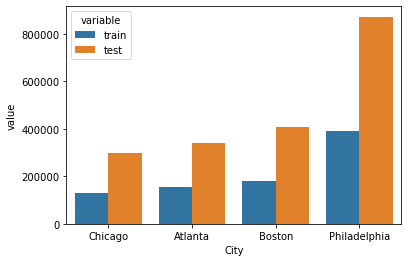

In [12]:
# Number of observations per "City" in Train & Test dataset - similar distribution of data per city 
train_city = df_train.groupby('City').size().reset_index().rename(columns={0:'train'})
test_city = df_test.groupby('City').size().reset_index().rename(columns={0:'test'})

data = train_city.merge(test_city, on='City').sort_values('test')
display (data)

sns.barplot(x='City',y='value',hue='variable',data=data.melt(id_vars='City', value_vars=['train','test']))

,City,train,test
0,Atlanta,377,468
1,Boston,975,1192
3,Philadelphia,1318,1715
2,Chicago,2135,2567


<AxesSubplot:xlabel='City', ylabel='value'>

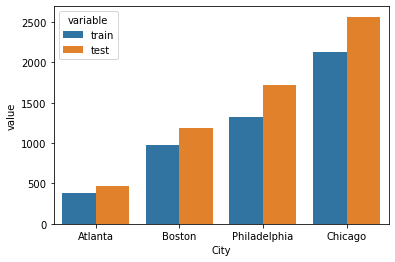

In [13]:
# Number of Intersections per City in Train & Test dataset - similar distribution of data per city 
train_intersection = df_train[['City', 'IntersectionId']].drop_duplicates().groupby('City').size().reset_index().rename(columns={0:'train'})
test_intersection = df_test[['City', 'IntersectionId']].drop_duplicates().groupby('City').size().reset_index().rename(columns={0:'test'})

data = train_intersection.merge(test_intersection, on='City').sort_values('train')
display(data)

sns.barplot(x='City',y='value',hue='variable',data=data.melt(id_vars='City', value_vars=['train','test']))

,Month,train,test
0,1,825,1725
1,5,175,345
2,6,109760,248749
3,7,110750,249488
4,8,122755,275063
5,9,124686,278813
6,10,133489,296985
7,11,124739,280501
8,12,129208,289688


<AxesSubplot:xlabel='Month', ylabel='value'>

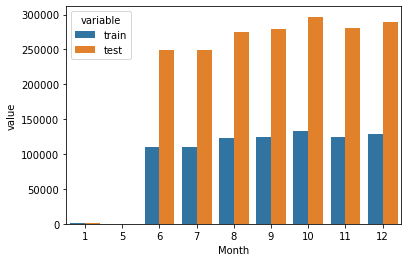

In [14]:
# Number of observation per Month in Train & Test dataset - Small about of data for Jan & May and missing data for Feb-Apr
train_months = df_train.groupby('Month').size().reset_index().rename(columns={0:'train'})
test_months = df_test.groupby('Month').size().reset_index().rename(columns={0:'test'})

data = train_months.merge(test_months, on='Month')
display(data)

sns.barplot(x='Month',y='value',hue='variable',data=data.melt(id_vars='Month', value_vars=['train','test']))

<AxesSubplot:xlabel='Hour', ylabel='value'>

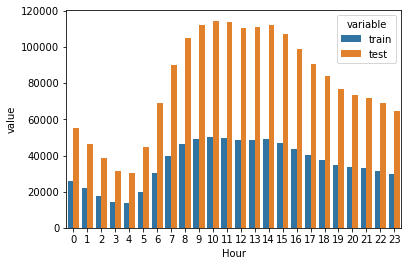

In [15]:
# Number of observation per Hour in Train & Test dataset - Similar distrbution of data in Train & Test datasets
train_hours = df_train.groupby('Hour').size().reset_index().rename(columns={0:'train'})
test_hours = df_test.groupby('Hour').size().reset_index().rename(columns={0:'test'})

data = train_hours.merge(test_hours, on='Hour')
#display(data)

sns.barplot(x='Hour',y='value',hue='variable',data=data.melt(id_vars='Hour', value_vars=['train','test']))

Both datasets have similar distrubtion of data for the 4 cities and for the same months

Now we will focus our analysis on the Train dataset

### 1.1 Descriptive Statistics

**Train dataset includes :**
- Total time stopped = the amount of time spent at 0 speed
- Time from first stop = time from the first stop until the vehicle passes through the intersection
- Distance to first stop = the distance from the center of the intersection to the first stop, to give an idea of queue length

The data is presented in percentile 

In [16]:
# Descriptive statistics of the "Total time stopped"
df_train[['TotalTimeStopped_p20','TotalTimeStopped_p40','TotalTimeStopped_p50',
          'TotalTimeStopped_p60','TotalTimeStopped_p80']].describe().T

,count,mean,std,min,25%,50%,75%,max
TotalTimeStopped_p20,856387.0,1.755596,7.146549,0.0,0.0,0.0,0.0,298.0
TotalTimeStopped_p40,856387.0,5.403592,12.981674,0.0,0.0,0.0,0.0,375.0
TotalTimeStopped_p50,856387.0,7.722655,15.685910,0.0,0.0,0.0,10.0,375.0
TotalTimeStopped_p60,856387.0,11.925195,19.761325,0.0,0.0,0.0,18.0,377.0
TotalTimeStopped_p80,856387.0,22.948621,28.274091,0.0,0.0,16.0,34.0,763.0


On average, the first 60% of cars didn't stop at the intersecton while the cars at the 80th percentile stopped for 16 seconds

In [17]:
# Descriptive statistics of the "Time from first stop" 
df_train[['TimeFromFirstStop_p20','TimeFromFirstStop_p40', 'TimeFromFirstStop_p50','TimeFromFirstStop_p60',
          'TimeFromFirstStop_p80']].describe().T

,count,mean,std,min,25%,50%,75%,max
TimeFromFirstStop_p20,856387.0,3.181096,11.835994,0.0,0.0,0.0,0.0,337.0
TimeFromFirstStop_p40,856387.0,9.162174,20.446568,0.0,0.0,0.0,0.0,356.0
TimeFromFirstStop_p50,856387.0,12.722165,24.219271,0.0,0.0,0.0,22.0,356.0
TimeFromFirstStop_p60,856387.0,18.926085,29.851797,0.0,0.0,0.0,31.0,357.0
TimeFromFirstStop_p80,856387.0,34.201656,41.130668,0.0,0.0,27.0,49.0,359.0


On average, time from the first stop until the vehicle passes through the intersection for 80the perctile of the cars is 27 seconds

In [18]:
# Descriptive statistics of the "•Distance to first stop" 
df_train[['DistanceToFirstStop_p20','DistanceToFirstStop_p40', 'DistanceToFirstStop_p50','DistanceToFirstStop_p60',
 'DistanceToFirstStop_p80']].describe().T

,count,mean,std,min,25%,50%,75%,max
DistanceToFirstStop_p20,856387.0,6.765856,29.535968,0.0,0.0,0.0,0.00,1901.9
DistanceToFirstStop_p40,856387.0,20.285128,59.202108,0.0,0.0,0.0,0.00,2844.4
DistanceToFirstStop_p50,856387.0,28.837113,75.217343,0.0,0.0,0.0,53.10,2851.1
DistanceToFirstStop_p60,856387.0,44.272310,102.032250,0.0,0.0,0.0,64.20,3282.4
DistanceToFirstStop_p80,856387.0,83.991313,160.709797,0.0,0.0,60.4,85.95,4079.2


On average, the distance from the first stop until the vehicle passes through the intersection for 80the perctile of the cars is 60 'meters'

### 1.2 Traffic Congestion by City

In [19]:
# Averages per City based on 50 & 80 percentile 
df_train.groupby('City').agg({'TotalTimeStopped_p50':'mean','TimeFromFirstStop_p50':'mean','DistanceToFirstStop_p50':'mean','TotalTimeStopped_p80':'mean','TimeFromFirstStop_p80':'mean','DistanceToFirstStop_p80':'mean'})

,TotalTimeStopped_p50,TimeFromFirstStop_p50,DistanceToFirstStop_p50,TotalTimeStopped_p80,TimeFromFirstStop_p80,DistanceToFirstStop_p80
City,,,,,,
Atlanta,9.736069,15.231519,30.860906,28.911256,41.621201,105.185034
Boston,8.603812,13.225124,23.460217,25.922292,35.435076,62.671911
Chicago,7.141947,11.433159,24.727496,21.380041,31.045220,69.869600
Philadelphia,6.706976,11.918583,31.866747,19.723289,31.721877,89.993218


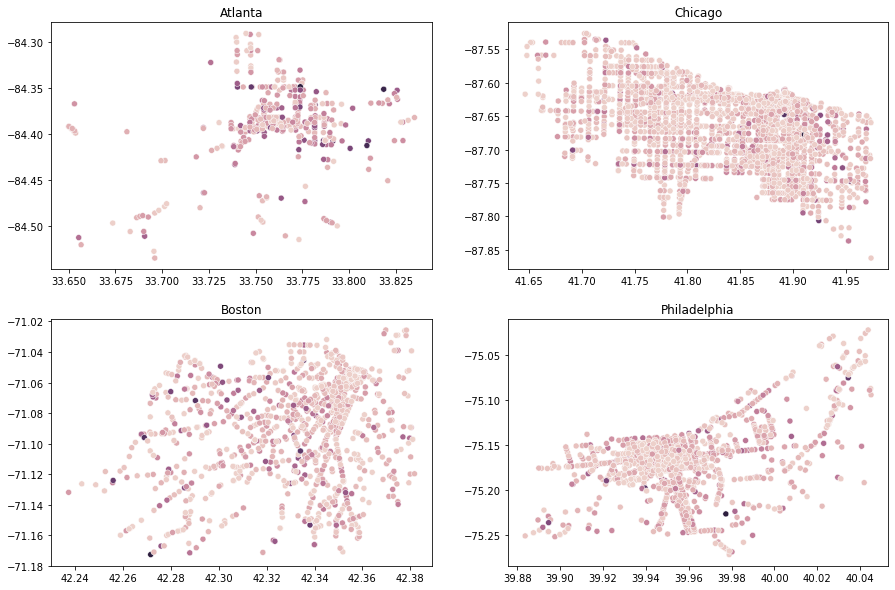

In [20]:
data = df_train.groupby(['City','IntersectionId','Latitude','Longitude']).agg({'TotalTimeStopped_p50':'mean'}).reset_index()

fig,axes=plt.subplots(nrows=2, ncols=2, figsize=(15,10))
for i,city in enumerate(data['City'].unique().tolist()):   
    sns.scatterplot(x='Latitude',y='Longitude',data=data[data['City']==city],hue='TotalTimeStopped_p50',ax=axes[i%2,i//2],legend=False)
    axes[i%2,i//2].set_title(city)
    axes[i%2,i//2].set_xlabel('')
    axes[i%2,i//2].set_ylabel('')

Text(0.5, 0.98, 'Hourly Traffic on Weekdays')

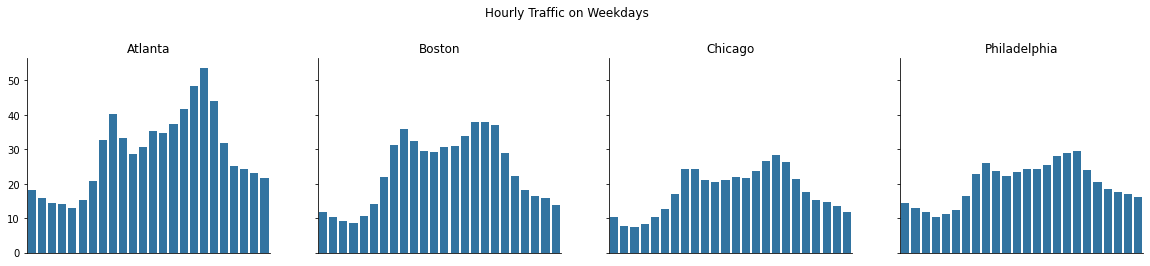

In [21]:
# Hourly Traffic per City on Weekdays using 80 percentile 
data = df_train[df_train['Weekend']==0].groupby(['City','Hour']).agg({'TotalTimeStopped_p80':'mean'}).reset_index()

fig,axes = plt.subplots(nrows=1, ncols=data['City'].nunique(), figsize=(20,4), sharey=True)
for i,city in enumerate(data['City'].unique()):
    sns.barplot(data=data[data['City']==city] ,x='Hour', y='TotalTimeStopped_p80',ax=axes[i], color='C0')
    axes[i].set_ylabel('')
    axes[i].set_title(city)
    axes[i].set_xlabel('')
    axes[i].get_xaxis().set_ticks([])
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
plt.subplots_adjust(top=0.8)
fig.suptitle('Hourly Traffic on Weekdays')

Text(0.5, 0.98, 'Hourly Traffic on Weekends')

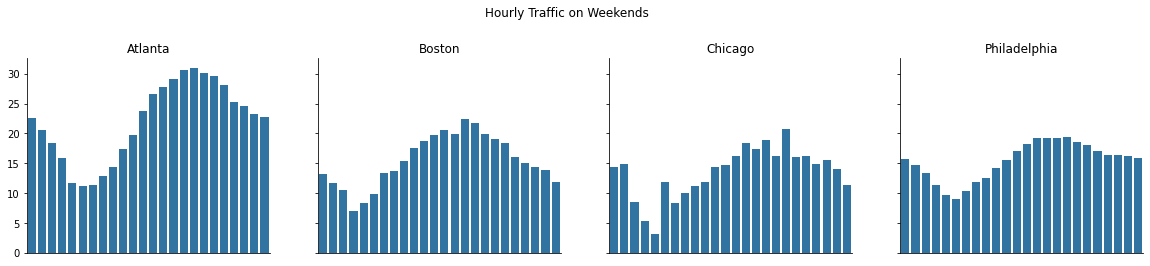

In [22]:
# Hourly Traffic per City on Weekends using 80 percentile 
data = df_train[df_train['Weekend']==1].groupby(['City','Hour']).agg({'TotalTimeStopped_p80':'mean'}).reset_index()

fig,axes = plt.subplots(nrows=1, ncols=data['City'].nunique(), figsize=(20,4), sharey=True)
for i,city in enumerate(data['City'].unique()):
    sns.barplot(data=data[data['City']==city] ,x='Hour', y='TotalTimeStopped_p80',ax=axes[i], color='C0')
    axes[i].set_ylabel('')
    axes[i].set_title(city)
    axes[i].set_xlabel('')
    axes[i].get_xaxis().set_ticks([])
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
plt.subplots_adjust(top=0.8)
fig.suptitle('Hourly Traffic on Weekends')

Atlanta is more congested than the other cities with average waiting time of 9.7 seconds and distance to intersecion of 30 'meters' followed by Boston and Chicago

### 1.3 Monthly Traffic Analysis

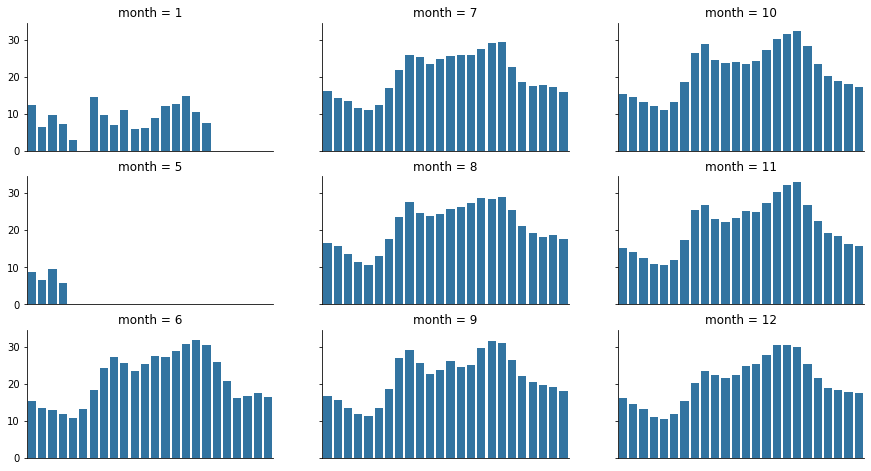

In [23]:
# Monthly Traffic per Hour using 80 percentile 
data = df_train.groupby(['Month','Hour']).agg({'TotalTimeStopped_p80':'mean'}).reset_index()

fig,axes = plt.subplots(nrows=data['Month'].nunique()//3, ncols=data['Month'].nunique()//3, figsize=(15,8), sharey=True,sharex=True)
for i,month in enumerate(sorted(data['Month'].unique())):
    sns.barplot(data=data[data['Month']==month] ,x='Hour', y='TotalTimeStopped_p80',ax=axes[i%3,i//3], color='C0')
    axes[i%3,i//3].set_title(f'month = {month}')
    axes[i%3,i//3].set_ylabel('')
    axes[i%3,i//3].set_xlabel('')
    axes[i%3,i//3].get_xaxis().set_ticks([])
    axes[i%3,i//3].spines['top'].set_visible(False)
    axes[i%3,i//3].spines['right'].set_visible(False)

In [24]:
# Monthly averages based on 50 & 80 percentile 
df_train.groupby('Month').agg({'Month':'count','TotalTimeStopped_p50':'mean','TimeFromFirstStop_p50':'mean','DistanceToFirstStop_p50':'mean','TotalTimeStopped_p80':'mean','TimeFromFirstStop_p80':'mean','DistanceToFirstStop_p80':'mean'}).rename(columns = {'Month':'Count'})

,Count,TotalTimeStopped_p50,TimeFromFirstStop_p50,DistanceToFirstStop_p50,TotalTimeStopped_p80,TimeFromFirstStop_p80,DistanceToFirstStop_p80
Month,,,,,,,
1,825,2.109091,3.200000,6.830909,9.077576,12.935758,32.538667
5,175,2.251429,4.011429,12.113143,7.902857,12.137143,37.552000
6,109760,8.245973,13.453699,30.207791,23.831469,35.233856,85.232089
7,110750,7.469698,12.198700,27.475679,22.399070,33.015594,80.405827
8,122755,7.600904,12.537607,28.464684,22.840316,34.035168,84.282824
9,124686,7.965136,13.177101,30.139419,23.306346,35.008694,87.170451
10,133489,7.916240,13.043367,29.363418,23.277506,34.805894,85.191978
11,124739,7.636152,12.614531,28.564560,22.943626,34.295040,83.884366
12,129208,7.303364,12.130418,27.819339,22.201381,33.172087,81.919974


- Minimum data provided for Jan & May and no data provided for Feb to April
- For Jun to Dec, similar trend with minimum traffic from midnight to early morning and then it peaks up from 7am to 9am in the morning and again from 3pm to 5pm which is typically the time to and from work

### 1.4 Data Correlation

<AxesSubplot:>

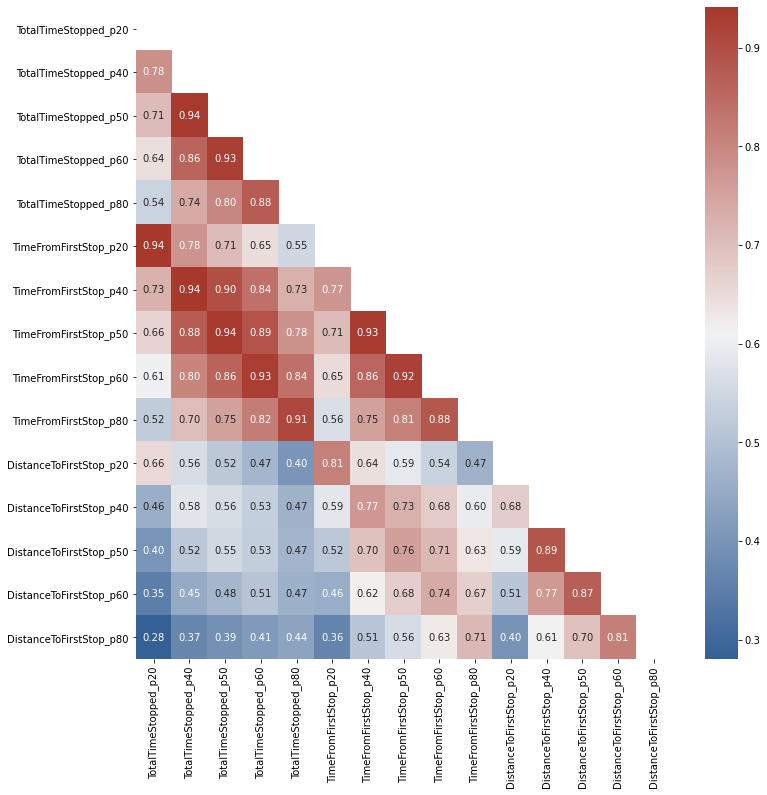

In [25]:
# Train correlation - "Total Time", "Time from First Stop" & "Distance from First Stop" are all postively correlated 
corr = df_train.iloc[:,12:-1].corr()
mask = np.triu(np.ones_like(corr,dtype=bool))
cmap = sns.diverging_palette(250,15,s=75,l=40, n=9, center='light', as_cmap=True)
fig = plt.figure(figsize=(12,12))
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt='.2f')

## 2. Data Preprocessing

### 2.1 Missing Observation Analysis

In [26]:
# check for Null Values in Train dataset - EntryStreetName & ExitStreetName are the only 2 columns with missing values 
df_train.isna().sum()

RowId                         0
IntersectionId                0
Latitude                      0
Longitude                     0
EntryStreetName            8148
ExitStreetName             6287
EntryHeading                  0
ExitHeading                   0
Hour                          0
Weekend                       0
Month                         0
Path                          0
TotalTimeStopped_p20          0
TotalTimeStopped_p40          0
TotalTimeStopped_p50          0
TotalTimeStopped_p60          0
TotalTimeStopped_p80          0
TimeFromFirstStop_p20         0
TimeFromFirstStop_p40         0
TimeFromFirstStop_p50         0
TimeFromFirstStop_p60         0
TimeFromFirstStop_p80         0
DistanceToFirstStop_p20       0
DistanceToFirstStop_p40       0
DistanceToFirstStop_p50       0
DistanceToFirstStop_p60       0
DistanceToFirstStop_p80       0
City                          0
dtype: int64

In [27]:
# Ratio of missing data in Train dataset
df_train[['EntryStreetName','ExitStreetName']].isna().sum() / df_train.shape[0]

EntryStreetName    0.009514
ExitStreetName     0.007341
dtype: float64

In [28]:
# check for Null Values in Test dataset - EntryStreetName & ExitStreetName are the only 2 columns with missing values 
df_test.isna().sum()

RowId                  0
IntersectionId         0
Latitude               0
Longitude              0
EntryStreetName    19198
ExitStreetName     15587
EntryHeading           0
ExitHeading            0
Hour                   0
Weekend                0
Month                  0
Path                   0
City                   0
dtype: int64

In [29]:
# Ratio of missing data in Test dataset
df_test[['EntryStreetName','ExitStreetName']].isna().sum() / df_test.shape[0]

EntryStreetName    0.009992
ExitStreetName     0.008112
dtype: float64

In [30]:
# check some of data data to see if we can fill missing data
df_train[df_train['EntryStreetName'].isna()].tail()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City
800759,2722116,1696,39.910597,-75.172856,NaN,South Broad Street,E,S,11,1,...,35.0,35.0,119.0,170.0,56.8,67.7,67.7,251.6,316.9,Philadelphia
800762,2722119,1696,39.910597,-75.172856,NaN,South Broad Street,E,S,12,1,...,40.0,44.0,62.0,67.0,59.3,68.0,71.1,85.6,114.5,Philadelphia
800772,2722129,1696,39.910597,-75.172856,NaN,South Broad Street,E,S,22,1,...,28.0,60.0,64.0,90.0,65.6,87.8,108.2,132.7,145.8,Philadelphia
800773,2722130,1696,39.910597,-75.172856,NaN,South Broad Street,E,S,23,1,...,19.0,44.0,65.0,95.0,48.3,68.0,70.3,102.7,121.2,Philadelphia
848575,2769932,1951,39.940322,-75.201374,NaN,Grays Ferry Avenue,N,E,8,0,...,0.0,11.0,18.0,33.0,0.0,0.0,20.4,23.6,39.9,Philadelphia


In [31]:
# "East" entry of Intersection# 1696 in Philadelphia shows missing EntryStreetName 
# this means we cannot simply fill the data by using Intersection# & City
df_train[(df_train['IntersectionId']==1696) & (df_train['City']=='Philadelphia')].groupby(['EntryStreetName','ExitStreetName','EntryHeading','ExitHeading','Path'], dropna=False).size()

EntryStreetName     ExitStreetName      EntryHeading  ExitHeading  Path                                     
South Broad Street  South Broad Street  N             N            South Broad Street_N_South Broad Street_N    101
                                        S             S            South Broad Street_S_South Broad Street_S    111
NaN                 South Broad Street  E             N            Unknown_E_South Broad Street_N                17
                                                      S            Unknown_E_South Broad Street_S                36
dtype: int64

In [32]:
# Intersection can have mutiple entries and exits - Intersection# 0 in Boston has 4 Entries (NE,E,W,S) & 5 Exits (NE,NW,E,W,S)
df_train[(df_train['IntersectionId']==0) & (df_train['City']=='Boston')][['EntryStreetName','ExitStreetName','EntryHeading','ExitHeading','Path']].value_counts()

EntryStreetName     ExitStreetName      EntryHeading  ExitHeading  Path                                  
Talbot Avenue       Talbot Avenue       W             W            Talbot Avenue_W_Talbot Avenue_W           33
New England Avenue  Norwell Street      NE            N            New England Avenue_NE_Norwell Street_N    22
Talbot Avenue       Talbot Avenue       E             E            Talbot Avenue_E_Talbot Avenue_E           21
Norwell Street      New England Avenue  S             SW           Norwell Street_S_New England Avenue_SW    11
New England Avenue  Talbot Avenue       NE            W            New England Avenue_NE_Talbot Avenue_W      6
Talbot Avenue       New England Avenue  E             SW           Talbot Avenue_E_New England Avenue_SW      3
Norwell Street      Talbot Avenue       S             W            Norwell Street_S_Talbot Avenue_W           2
New England Avenue  Talbot Avenue       NE            E            New England Avenue_NE_Talbot Avenue_E      

Here we notice couple of things : 
- there are different type of Streets (Avenues / Street / Highways ..etc)
- each street have different number of Entries and Exits - this is identified by direction 

In [33]:
# type of streets can be identified from the Street Name
data = df_train[['City','EntryStreetName','IntersectionId']].drop_duplicates()
print("Number of Avenues :", data['EntryStreetName'].str.contains('Avenue').sum())
print("Number of Streets :", data['EntryStreetName'].str.contains('Street').sum())
print("Number of Boulevards :", data['EntryStreetName'].str.contains('Boulevard').sum())
print("Number of Roads:", data['EntryStreetName'].str.contains('Road').sum())
print("Number of Highways :", data['EntryStreetName'].str.contains('Highway').sum())
print("Number of Drives :", data['EntryStreetName'].str.contains('Drive').sum())
print("Number of Parkways :", data['EntryStreetName'].str.contains('Parkway').sum())

Number of Avenues : 2420
Number of Streets : 4451
Number of Boulevards : 471
Number of Roads: 427
Number of Highways : 27
Number of Drives : 347
Number of Parkways : 91


In [34]:
# using directions to identify possible EntryHeading & ExitHeading values
print (df_train['EntryHeading'].unique())
print (df_train['ExitHeading'].unique())

['NW' 'SE' 'NE' 'SW' 'E' 'W' 'N' 'S']
['NW' 'SE' 'NE' 'SW' 'W' 'E' 'N' 'S']


Although we didn't fill or drop the missing data for StreetName, we identified 2 ascpects of the data that can help in our modeling. This will further explored in the Feature Engineering Section. 

Furthermore, StreetName will not be used in our model so having the missing data will not affect our analysis

### 2.2 Outlier Observation Analysis

<AxesSubplot:>

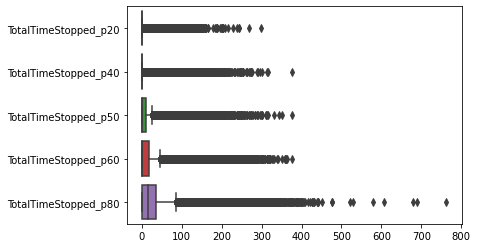

In [35]:
# Total time stopped = the amount of time spent at 0 speed
cols = ['TotalTimeStopped_p20','TotalTimeStopped_p40','TotalTimeStopped_p50', 
        'TotalTimeStopped_p60', 'TotalTimeStopped_p80']
sns.boxplot(data=df_train[cols],orient='h')

<AxesSubplot:>

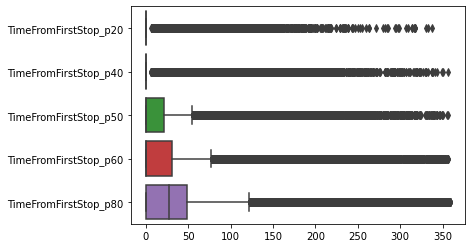

In [36]:
# Time from first stop = time from the first stop until the vehicle passes through the intersection
cols = ['TimeFromFirstStop_p20', 'TimeFromFirstStop_p40','TimeFromFirstStop_p50', 
        'TimeFromFirstStop_p60', 'TimeFromFirstStop_p80']
sns.boxplot(data=df_train[cols],orient='h')

<AxesSubplot:>

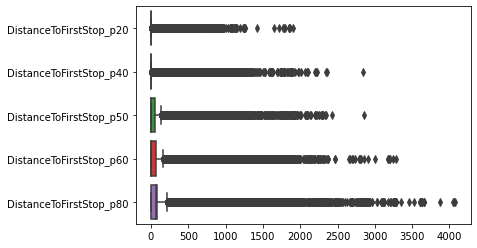

In [37]:
# Distance to first stop
cols = ['DistanceToFirstStop_p20', 'DistanceToFirstStop_p40', 'DistanceToFirstStop_p50',
       'DistanceToFirstStop_p60', 'DistanceToFirstStop_p80']
sns.boxplot(data=df_train[cols],orient='h')

The data is presented in pecetiles up to 80% - Therefore, outliers for extreme traffic congestions beyond 80% already been removed from data - therefore, we will not drop the outliers but we will normalize the data before modeling

## 3. Feature Engineering

### 3.1 Street Type

Street Type can affect traffic as smaller roads tend to be busier while wider roads tend to be faster. Street Type can be extracted from "Street Name". 

In [38]:
# We start by creating a columns to identify the type of the Street
#df_train['EntryStreetType'] = np.NaN
#df_train['ExitStreetType'] = np.NaN
#df_test['EntryStreetType'] = np.NaN
#df_test['ExitStreetType'] = np.NaN

str_code = ['Avenue','Street','Boulevard','Road','Highway','Drive','Parkway','Square','Way','Ave','St','Pkwy','Lane','Circle','Place','Other']
str_name = ['Avenue','Street','Boulevard','Road','Highway','Drive','Parkway','Square','Way','Avenue','Street','Parkway','Lane','Circle','Place','Other']

for st in range(len(str_code)):
    df_train.loc[~(df_train['EntryStreetName'].isna()) & (df_train['EntryStreetName'].str.contains(str_code[st])), 'EntryStreetType'] = str_name[st]
    df_train.loc[~(df_train['ExitStreetName'].isna()) & (df_train['ExitStreetName'].str.contains(str_code[st])), 'ExitStreetType'] = str_name[st]
    df_test.loc[~(df_test['EntryStreetName'].isna()) & (df_test['EntryStreetName'].str.contains(str_code[st])), 'EntryStreetType'] = str_name[st]
    df_test.loc[~(df_test['ExitStreetName'].isna()) & (df_test['ExitStreetName'].str.contains(str_code[st])), 'ExitStreetType'] = str_name[st]
    
df_train['EntryStreetType'].fillna('Other',inplace=True)
df_train['ExitStreetType'].fillna('Other',inplace=True)

df_test['EntryStreetType'].fillna('Other',inplace=True)
df_test['ExitStreetType'].fillna('Other',inplace=True)

In [39]:
print (df_train[(df_train['EntryStreetType']=='Other') & ~(df_train['EntryStreetName'].isna())]['EntryStreetName'].unique())

['The Fontainebleau Southwest' 'Maynard Terrace Southeast'
 'The Prado Northeast' 'Spring Techwood Connector' 'West Broadway'
 'Bowker Overpass' 'Charlesgate' 'Fenway' 'Arborway' 'Charlesgate East'
 'Riverway' 'Broadway' 'Boston University Bridge' 'East Broadway'
 'Charlesgate West' 'Jamaicaway' 'Long Wharf'
 'Thomas J. Butler Dedicated Freight Corridor' 'Sobin Park'
 'Cummington Mall' 'Park Plaza' 'East India Row' 'Wolcott Court'
 'North Fairbanks Court' 'North Broadway' 'East Midway Plaisance'
 'North Lincoln Park West' 'West Lithuanian Plaza Court' 'Fairmount'
 'Pier 70 Bld' 'Eakins Oval' 'Tenth Presbyterian Church Parking'
 'North Independence Mall West' 'Falls Bridge'
 'North Independence Ml East' 'Spring Garden Tunnel']


In [40]:
# Number of intersection per "EntryStreetType" - mostly Streets and Avenues
df_train[['City','EntryStreetType','IntersectionId']].drop_duplicates().groupby('EntryStreetType',dropna=False).size().sort_values()

EntryStreetType
Circle          5
Lane            5
Square         18
Place          20
Way            22
Highway        26
Parkway        90
Other         238
Drive         301
Road          381
Boulevard     444
Avenue       2068
Street       3176
dtype: int64

In [41]:
# Averages per Street Type based on 50 & 80 percentile 
df_train.groupby('EntryStreetType').agg({'RowId':'count','TotalTimeStopped_p50':'mean','TimeFromFirstStop_p50':'mean','DistanceToFirstStop_p50':'mean','TotalTimeStopped_p80':'mean','TimeFromFirstStop_p80':'mean','DistanceToFirstStop_p80':'mean'}).rename(columns = {'RowId':'Count'}).reset_index().sort_values('TotalTimeStopped_p50', ascending=False)

,EntryStreetType,Count,TotalTimeStopped_p50,TimeFromFirstStop_p50,DistanceToFirstStop_p50,TotalTimeStopped_p80,TimeFromFirstStop_p80,DistanceToFirstStop_p80
8,Place,402,22.753731,33.179104,46.823134,55.870647,76.253731,114.929104
5,Lane,724,14.364641,26.044199,68.262569,39.870166,65.531768,186.160359
6,Other,15195,13.055216,19.318921,32.385318,33.362159,44.580454,71.306371
12,Way,1932,11.802277,18.112836,34.081211,34.184265,45.327122,73.036491
10,Square,941,10.362380,14.705632,19.013815,24.865037,31.764081,44.647184
4,Highway,5674,10.321995,15.048467,27.484032,29.682940,39.021325,73.099260
2,Circle,944,10.067797,13.141949,18.827119,20.905720,26.241525,36.766843
9,Road,54705,9.181629,14.640983,30.197821,25.642208,37.716662,98.865925
3,Drive,37193,8.780335,13.580996,27.378905,26.184605,37.659640,97.270376
7,Parkway,16882,8.127414,12.407772,26.606172,23.107096,33.015460,84.094758


### 3.2 Number of Entries & Exits

Number of Entries and Exits of the intersection can affect the traffic and waiting time. This data will be extracted from "EntryHeading" & "ExitHeading"

In [42]:
# We can create columns to identify the number of directions for each intersection
entry_data = df_train[['City','IntersectionId','EntryHeading']].drop_duplicates().groupby(['City','IntersectionId']).agg({'EntryHeading':'count'}).reset_index().rename(columns={'EntryHeading':'EntryCount'})
exit_data = df_train[['City','IntersectionId','ExitHeading']].drop_duplicates().groupby(['City','IntersectionId']).agg({'ExitHeading':'count'}).reset_index().rename(columns={'ExitHeading':'ExitCount'})

# Then we add Number of Entries & Exits for each intersection
df_train = df_train.merge(entry_data, on=['City','IntersectionId'], how='left')
df_train = df_train.merge(exit_data, on=['City','IntersectionId'], how='left')
df_train.head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City,EntryStreetType,ExitStreetType,EntryCount,ExitCount
0,1921357,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,0,0,...,0.0,0.0,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard,3,2
1,1921358,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,0,0,...,0.0,0.0,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard,3,2
2,1921359,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,1,0,...,0.0,0.0,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard,3,2
3,1921360,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,1,0,...,0.0,0.0,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard,3,2
4,1921361,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,2,0,...,0.0,0.0,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard,3,2


In [43]:
# Replicate for Test dataset
entry_data = df_test[['City','IntersectionId','EntryHeading']].drop_duplicates().groupby(['City','IntersectionId']).agg({'EntryHeading':'count'}).reset_index().rename(columns={'EntryHeading':'EntryCount'})
exit_data = df_test[['City','IntersectionId','ExitHeading']].drop_duplicates().groupby(['City','IntersectionId']).agg({'ExitHeading':'count'}).reset_index().rename(columns={'ExitHeading':'ExitCount'})

df_test = df_test.merge(entry_data, on=['City','IntersectionId'], how='left')
df_test = df_test.merge(exit_data, on=['City','IntersectionId'], how='left')
df_test.head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,Month,Path,City,EntryStreetType,ExitStreetType,EntryCount,ExitCount
0,0,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,NE,NE,0,0,6,Peachtree Street Southwest_NE_Peachtree Street...,Atlanta,Street,Street,3,3
1,1,1,33.75094,-84.393032,Peachtree Street Southwest,Mitchell Street Southwest,SW,SE,0,0,6,Peachtree Street Southwest_SW_Mitchell Street ...,Atlanta,Street,Street,3,3
2,2,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,SW,SW,0,0,6,Peachtree Street Southwest_SW_Peachtree Street...,Atlanta,Street,Street,3,3
3,3,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,NE,NE,1,0,6,Peachtree Street Southwest_NE_Peachtree Street...,Atlanta,Street,Street,3,3
4,4,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,SW,SW,1,0,6,Peachtree Street Southwest_SW_Peachtree Street...,Atlanta,Street,Street,3,3


In [44]:
# Averages per 'Entry Count' based on 50 & 80 percentile - intersecions with more entries are busier
df_train.groupby('EntryCount').agg({'RowId':'count','TotalTimeStopped_p50':'mean','TimeFromFirstStop_p50':'mean','DistanceToFirstStop_p50':'mean','TotalTimeStopped_p80':'mean','TimeFromFirstStop_p80':'mean','DistanceToFirstStop_p80':'mean'}).rename(columns = {'RowId':'Count'}).reset_index().sort_values('TotalTimeStopped_p50', ascending=False)

,EntryCount,Count,TotalTimeStopped_p50,TimeFromFirstStop_p50,DistanceToFirstStop_p50,TotalTimeStopped_p80,TimeFromFirstStop_p80,DistanceToFirstStop_p80
5,6,3702,23.679092,33.889519,57.903944,53.062129,68.813344,113.400567
4,5,21037,13.814565,22.599373,54.349812,33.423920,49.641109,126.041669
3,4,291155,11.918030,19.525565,44.758606,32.142622,47.461730,119.955499
2,3,310282,6.641887,10.999297,24.660358,20.641752,30.879687,74.407189
1,2,205081,3.284254,5.594224,12.527580,13.648471,21.077340,50.372715
0,1,25130,1.230163,1.953681,3.401743,7.601870,10.669081,20.468743


### 3.3 Turn Type

Type of turn (left turns / right_turn / same entry-same exit directions ..etc) can affect congestion and waiting time. This extracted from EntryHeading & ExitHeading
 
But to implement that, first we need to map directions while keeping the right sequence: N = 1, NE = 2, E = 3 ...etc 

In [45]:
# EntryHeading & ExitHeading while keeping the sequence in order
heading_map = {'N':1,'NE':2,'E':3,'SE':4,'S':5, 'SW':6, 'W':7, 'NW': 8}

df_train['EntryHeading'] = df_train['EntryHeading'].map(heading_map)
df_train['ExitHeading'] = df_train['ExitHeading'].map(heading_map)
df_test['EntryHeading'] = df_test['EntryHeading'].map(heading_map)
df_test['ExitHeading'] = df_test['ExitHeading'].map(heading_map)

df_train.head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City,EntryStreetType,ExitStreetType,EntryCount,ExitCount
0,1921357,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,8,8,0,0,...,0.0,0.0,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard,3,2
1,1921358,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,4,4,0,0,...,0.0,0.0,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard,3,2
2,1921359,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,8,8,1,0,...,0.0,0.0,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard,3,2
3,1921360,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,4,4,1,0,...,0.0,0.0,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard,3,2
4,1921361,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,8,8,2,0,...,0.0,0.0,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard,3,2


In [46]:
# Turn Type - difference between Exit & Entry
df_train['TurnType'] = df_train['ExitHeading'] - df_train['EntryHeading']
df_test['TurnType'] = df_test['ExitHeading'] - df_test['EntryHeading']
df_train.head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City,EntryStreetType,ExitStreetType,EntryCount,ExitCount,TurnType
0,1921357,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,8,8,0,0,...,0.0,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard,3,2,0
1,1921358,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,4,4,0,0,...,0.0,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard,3,2,0
2,1921359,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,8,8,1,0,...,0.0,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard,3,2,0
3,1921360,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,4,4,1,0,...,0.0,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard,3,2,0
4,1921361,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,8,8,2,0,...,0.0,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard,3,2,0


In [47]:
# Averages per 'EntryExitDiff' based on 50 & 80 percentile 
df_train.groupby('TurnType').agg({'RowId':'count','TotalTimeStopped_p50':'mean','TimeFromFirstStop_p50':'mean','DistanceToFirstStop_p50':'mean','TotalTimeStopped_p80':'mean','TimeFromFirstStop_p80':'mean','DistanceToFirstStop_p80':'mean'}).rename(columns = {'RowId':'Count'}).reset_index().sort_values('TotalTimeStopped_p50', ascending=False)

,TurnType,Count,TotalTimeStopped_p50,TimeFromFirstStop_p50,DistanceToFirstStop_p50,TotalTimeStopped_p80,TimeFromFirstStop_p80,DistanceToFirstStop_p80
3,-4,291,28.756014,40.027491,49.361168,61.484536,77.725086,91.234364
4,-3,3928,22.864817,34.660132,57.218585,51.991853,70.166752,127.749364
12,5,3566,19.143017,27.641615,42.269994,44.573752,57.823051,84.561497
5,-2,59200,17.733260,26.926064,46.942792,42.425524,58.738074,110.615829
13,6,19091,16.610235,25.509245,45.620952,40.349903,55.854015,104.487025
11,4,352,14.982955,24.161932,36.260795,37.767045,54.110795,96.106818
6,-1,39214,11.706074,18.460550,39.086076,30.693349,43.688173,98.248582
10,3,2513,10.458416,18.218464,38.091086,32.732193,51.284918,128.972105
0,-7,4580,10.009607,19.004585,58.163406,27.611135,45.351092,131.302686
14,7,5704,9.241234,14.987728,33.406066,27.226683,38.390077,89.789288


### 3.3 Distance from City Centre

City Centers are busier than country sides. Distance to City Center is culculated using Latitude and Longitude

In [48]:
from sklearn.neighbors import DistanceMetric

def calc_distance(row):#(lat1, lon1, lat2, lon2):
    R = 6373.0
    lat1 = row['CCLatitude']
    lon1 = row['CCLongitude']
    lat2 = row['Latitude']
    lon2 = row['Longitude']
    dist = DistanceMetric.get_metric('haversine')
    X = [[np.radians(lat1), np.radians(lon1)], [np.radians(lat2), np.radians(lon2)]]
    distance = np.abs(np.array(R * dist.pairwise(X)).item(1))
    return distance

In [49]:
# https://www.latlong.net/country/united-states-236.html
cities = ['Atlanta', 'Boston', 'Chicago', 'Philadelphia']
cc_lat = [33.753746, 42.361145,41.881832,39.952583]
cc_lon = [-84.386330,-71.057083,-87.623177,-75.165222]

for c in range(len(cities)):
    df_train.loc[df_train['City']==cities[c], 'CCLatitude'] = cc_lat[c]
    df_train.loc[df_train['City']==cities[c], 'CCLongitude'] = cc_lon[c]
    df_test.loc[df_test['City']==cities[c], 'CCLatitude'] = cc_lat[c]
    df_test.loc[df_test['City']==cities[c], 'CCLongitude'] = cc_lon[c]
    
    
df_train['CCDist'] = df_train.apply(calc_distance, axis=1)
df_test['CCDist'] = df_test.apply(calc_distance, axis=1)
df_train.head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,DistanceToFirstStop_p80,City,EntryStreetType,ExitStreetType,EntryCount,ExitCount,TurnType,CCLatitude,CCLongitude,CCDist
0,1921357,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,8,8,0,0,...,0.0,Atlanta,Boulevard,Boulevard,3,2,0,33.753746,-84.38633,5.840422
1,1921358,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,4,4,0,0,...,0.0,Atlanta,Boulevard,Boulevard,3,2,0,33.753746,-84.38633,5.840422
2,1921359,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,8,8,1,0,...,0.0,Atlanta,Boulevard,Boulevard,3,2,0,33.753746,-84.38633,5.840422
3,1921360,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,4,4,1,0,...,0.0,Atlanta,Boulevard,Boulevard,3,2,0,33.753746,-84.38633,5.840422
4,1921361,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,8,8,2,0,...,0.0,Atlanta,Boulevard,Boulevard,3,2,0,33.753746,-84.38633,5.840422


### 3.4 Weather Information

Monthly weather including temperature & rain can affect congestion. This can also help generalize the model for the missing months 

In [50]:
# Use Month for indetify weather impact on traffic
# https://www.climatestotravel.com/
temp = [['Chicago',-4.6,-2.4,3.2,9.4,15.1,20.5,23.3,22.4,18.1,11.4,4.6,-2.3],
['Boston',-1.5,0,3,9,14.5,19.5,23,22,18,12,7,1.5],
['Atlanta',6.6,8.7,12.6,16.8,21.4,25.3,26.8,26.3,23.2,17.6,12.5,7.7],
['Philadelphia',0.5,2.1,6.4,12.2,17.7,23,25.6,24.8,20.6,14.2,8.6,3]]

rain = [['Chicago',45,45,65,85,95,90,95,125,80,80,80,55],
['Boston',85,85,110,95,90,95,85,85,85,100,100,95],
['Atlanta',105,120,120,85,95,100,135,100,115,85,105,100],
['Philadelphia',75,65,95,90,95,85,110,90,95,80,75,90]]

columns = ['City'] + np.linspace(1,12,12,dtype=int).tolist()

df_temp = pd.DataFrame(temp, columns = columns).set_index('City').unstack().reset_index()
df_temp.columns = ['Month','City','Temperature']

df_rain = pd.DataFrame(rain, columns = columns).set_index('City').unstack().reset_index()
df_rain.columns = ['Month','City','Rainfall']

df_train = df_train.merge(df_temp, on=['Month','City'])
df_train = df_train.merge(df_rain, on=['Month','City'])

df_test = df_test.merge(df_temp, on=['Month','City'])
df_test = df_test.merge(df_rain, on=['Month','City'])

df_train.head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,EntryStreetType,ExitStreetType,EntryCount,ExitCount,TurnType,CCLatitude,CCLongitude,CCDist,Temperature,Rainfall
0,1921357,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,8,8,0,0,...,Boulevard,Boulevard,3,2,0,33.753746,-84.38633,5.840422,25.3,100
1,1921358,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,4,4,0,0,...,Boulevard,Boulevard,3,2,0,33.753746,-84.38633,5.840422,25.3,100
2,1921359,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,8,8,1,0,...,Boulevard,Boulevard,3,2,0,33.753746,-84.38633,5.840422,25.3,100
3,1921360,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,4,4,1,0,...,Boulevard,Boulevard,3,2,0,33.753746,-84.38633,5.840422,25.3,100
4,1921361,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,8,8,2,0,...,Boulevard,Boulevard,3,2,0,33.753746,-84.38633,5.840422,25.3,100


## 4. Data Scaling

In [51]:
df_train.columns

Index(['RowId', 'IntersectionId', 'Latitude', 'Longitude', 'EntryStreetName',
       'ExitStreetName', 'EntryHeading', 'ExitHeading', 'Hour', 'Weekend',
       'Month', 'Path', 'TotalTimeStopped_p20', 'TotalTimeStopped_p40',
       'TotalTimeStopped_p50', 'TotalTimeStopped_p60', 'TotalTimeStopped_p80',
       'TimeFromFirstStop_p20', 'TimeFromFirstStop_p40',
       'TimeFromFirstStop_p50', 'TimeFromFirstStop_p60',
       'TimeFromFirstStop_p80', 'DistanceToFirstStop_p20',
       'DistanceToFirstStop_p40', 'DistanceToFirstStop_p50',
       'DistanceToFirstStop_p60', 'DistanceToFirstStop_p80', 'City',
       'EntryStreetType', 'ExitStreetType', 'EntryCount', 'ExitCount',
       'TurnType', 'CCLatitude', 'CCLongitude', 'CCDist', 'Temperature',
       'Rainfall'],
      dtype='object')

In [52]:
# features to be used in modeling 
features = ['Hour', 'Weekend','EntryStreetType', 'ExitStreetType', 'EntryCount', 
            'ExitCount','TurnType', 'CCDist','Temperature','Rainfall','City']

_df_train = df_train[features]
_df_test = df_test[features]

Categorical variables in the data set should be converted into numerical values. For this reason, these transformation processes are performed with Label Encoding

In [53]:
# encoding city name
city_encoder = LabelEncoder().fit(cities)
_df_train.loc[:,'City'] = city_encoder.transform(_df_train['City'])
_df_test.loc[:,'City'] = city_encoder.transform(_df_test['City'])

# encoding street type
StreetType = np.unique(_df_train['EntryStreetType'].unique().tolist() + _df_test['ExitStreetType'].unique().tolist()) 
street_encoder = LabelEncoder().fit(StreetType)
_df_train.loc[:,'EntryStreetType'] = street_encoder.transform(_df_train['EntryStreetType'])
_df_train.loc[:,'ExitStreetType'] = street_encoder.transform(_df_train['ExitStreetType'])
_df_test.loc[:,'EntryStreetType'] = street_encoder.transform(_df_test['EntryStreetType'])
_df_test.loc[:,'ExitStreetType'] = street_encoder.transform(_df_test['ExitStreetType'])

_df_train.head()

,Hour,Weekend,EntryStreetType,ExitStreetType,EntryCount,ExitCount,TurnType,CCDist,Temperature,Rainfall,City
0,0,0,1,1,3,2,0,5.840422,25.3,100,0
1,0,0,1,1,3,2,0,5.840422,25.3,100,0
2,1,0,1,1,3,2,0,5.840422,25.3,100,0
3,1,0,1,1,3,2,0,5.840422,25.3,100,0
4,2,0,1,1,3,2,0,5.840422,25.3,100,0


We can improve the performance of the models by standardization. These are methods such as" Normalize"," MinMax"," Robust" and "Scale" that can be used for standardization

In [54]:
scaler = StandardScaler().fit(_df_train)
df_train_scaled = scaler.transform(_df_train)
df_test_scaled = scaler.transform(_df_test)

## 5. PCA

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Text(0.5, 0, 'PCA feature')

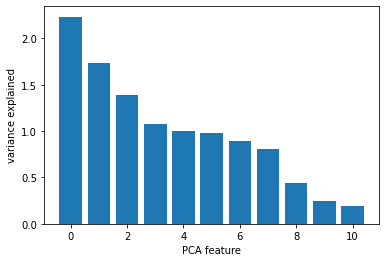

In [55]:
# We create PCA and plot variance explained
pca = PCA()
pca.fit_transform(df_train_scaled)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.ylabel('variance explained')
plt.xlabel('PCA feature')

Text(0, 0.5, 'cumulative variance ratio')

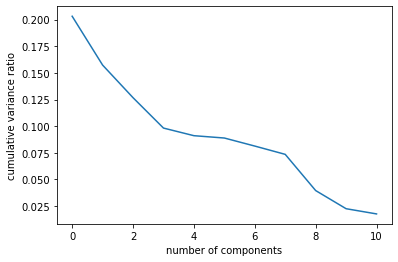

In [56]:
# We also plot the explained variance ratio.
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative variance ratio')

(0.0, 1.1)

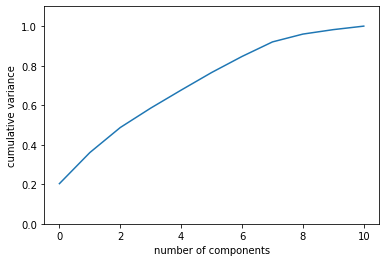

In [57]:
# We also plot the cumultive explained variance ratio.
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative variance')
plt.ylim([0,1.1])

In [58]:
print ("Number of components with explained variance ratio >= 0.01 :", (pca.explained_variance_ratio_>=0.05).sum())
print (f"Total explained variance retained : {pca.explained_variance_ratio_[:np.sum(pca.explained_variance_ratio_>=.01)].sum():2.4f}")

Number of components with explained variance ratio >= 0.01 : 8
Total explained variance retained : 1.0000


In [59]:
# create a pca dataframe based on 90% explained variance retained 
pca = PCA(n_components=.90).fit(df_train_scaled)
pca_train = pca.transform(df_train_scaled)
pca_test = pca.transform(df_test_scaled)
col_lst = []
for i in range(0,pca_train.shape[1]):
    col_lst.append(f'PC{i}')
    
df_pca_train = pd.DataFrame(pca_train,columns=col_lst)
df_pca_test = pd.DataFrame(pca_test,columns=col_lst)
df_pca_train.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.891265,-0.058331,-2.134907,1.680852,0.375716,1.233420,0.654169,-0.696591
1,0.891265,-0.058331,-2.134907,1.680852,0.375716,1.233420,0.654169,-0.696591
2,0.887609,-0.057651,-2.125916,1.606783,0.339752,1.091703,0.656199,-0.685113
3,0.887609,-0.057651,-2.125916,1.606783,0.339752,1.091703,0.656199,-0.685113
4,0.883953,-0.056972,-2.116925,1.532714,0.303788,0.949986,0.658229,-0.673635


## 6. Base Models

Since this is a supervised regression problem, we will use regression models (LR/KNN/DT/RF) and comapare the results.

We will use Root Mean Squared Error (rmse) as a criteria to evaluate the performance of each model.

In [60]:
# Trying both the scaled & PCA data to see if we can maintain good accuracy level with less features
X = df_train_scaled 
X_pca = df_pca_train
y = df_train[['TotalTimeStopped_p20','TotalTimeStopped_p50','TotalTimeStopped_p80',
     'DistanceToFirstStop_p20','DistanceToFirstStop_p50','DistanceToFirstStop_p80']]

# split the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)

In [61]:
# Create function to run different models and return rmse
def modeling(X_train, X_test, y_train, y_test):
    models = []
    models.append(('LR', LinearRegression()))
    models.append(('KNN', KNeighborsRegressor()))
    models.append(('DT', DecisionTreeRegressor(random_state = 1)))
    models.append(('RF', RandomForestRegressor(random_state = 1)))
    models.append(('GB', MultiOutputRegressor(GradientBoostingRegressor(random_state = 1))))
#    models.append(('RG-SVR', RegressorChain(SVR())))

    #Evaluate each model in turn
    names = []
    rmses = []
    
    for name, model in models:
#    cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
#    cv_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
        model.fit (X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error (y_test, y_pred)
        rmse = np.sqrt(mse)
        print (f'{name} : mse {mse} - rmse {rmse}')
        names.append(name)
        rmses.append(rmse)
    return names, rmses

In [62]:
# run modeling function on scaled data
print ("Scaled Data Modeling :")
names, rmses = modeling (X_train, X_test, y_train, y_test)

Scaled Data Modeling :
LR : mse 5394.5825470530735 - rmse 73.44782193539216
KNN : mse 5171.071154814284 - rmse 71.91016030307736
DT : mse 6306.128125869494 - rmse 79.41113351331471
RF : mse 4074.6433459881187 - rmse 63.832933083073335
GB : mse 4986.399346970172 - rmse 70.61444149018082


In [63]:
# run modeling function on pca data
print ("PCA Data Modeling :")
pca_names, pca_rmses = modeling (X_train_pca, X_test_pca, y_train_pca, y_test_pca)

PCA Data Modeling :
LR : mse 5401.503226974282 - rmse 73.49491973581767
KNN : mse 5360.948406872812 - rmse 73.21849770975099
DT : mse 8608.805742585542 - rmse 92.78365019002833
RF : mse 5234.627995898852 - rmse 72.35072906266288
GB : mse 5257.026592416755 - rmse 72.50535561195983


  names idx     variable      value
0    LR   1  scaled data  73.447822
1   KNN   2  scaled data   71.91016
2    DT   3  scaled data  79.411134
3    RF   4  scaled data  63.832933
4    GB   5  scaled data  70.614441
5    LR   1     pca data   73.49492
6   KNN   2     pca data  73.218498
7    DT   3     pca data   92.78365
8    RF   4     pca data  72.350729
9    GB   5     pca data  72.505356


Text(0, 0.5, 'rmse')

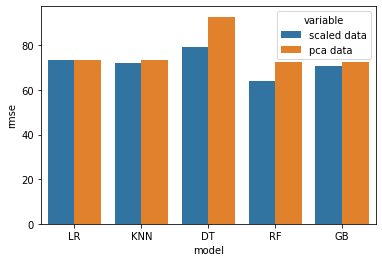

In [64]:
# plot and compare the results of scaled data and pca data
results = pd.DataFrame([range(1,6),names,rmses, pca_rmses]).T
results.columns = ['idx','names', 'scaled data', 'pca data']
print (results.melt(id_vars=['names','idx']))
ax = sns.barplot(x='idx',y='value',hue='variable', data=results.melt(id_vars=['names','idx']))
ax.set_xticklabels(names)
ax.set_xlabel("model")
ax.set_ylabel("rmse")

Best rmse result was obtained when we ran RF on scaled data. 

In general, modeling scaled data performed better that PCA data since we use didn't try to reduce dimesionality of the data. Yet the gap in the different models vary as we see in the LR the gap in rmse is very minimum while it's quiet high in the DT model

## 7. Model Tuning

### 7.1 Random Forests Tuning

Since RF performed the best in our initial testing, we will start by trying to tune the RF paramters

In [61]:
# i tried different parameters but best results were obtained when I kept the default parameters
# that's why I commented the paramaters to help the application run faster 
rf_params = {}#"n_estimators" :[50, 100], 
             #"min_samples_split": [10,20],
             #"max_depth": [10,20]}

In [62]:
rf_model = RandomForestRegressor(random_state = 1)

In [63]:
rf_cv = GridSearchCV(rf_model, 
                    rf_params,
                    cv = 3).fit(X_train, y_train)

In [64]:
rf_cv.best_params_

{}

In [65]:
rf_tuned = rf_cv.best_estimator_
y_pred = rf_tuned.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = np.sqrt(rf_mse)
print ('mse :', rf_mse)
print ('rmse :', rf_rmse) 

mse : 4074.6433459881187
rmse : 63.832933083073335


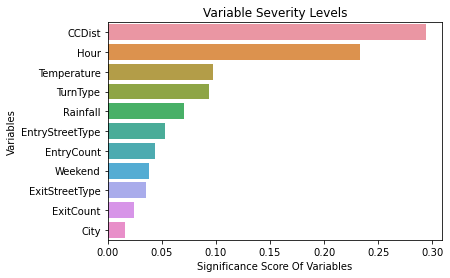

In [66]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=_df_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

### 7.2 Gradient Boosting Tuning

Next we will tune the GB paramters

In [67]:
gb_params = {}#"n_estimators" :[50, 100, 200], 
             #"min_samples_split": [5,10,15]}#,
            #"max_depth": [5,10,20]}

In [68]:
gb_model = MultiOutputRegressor(GradientBoostingRegressor(random_state = 1))

In [69]:
gb_cv = GridSearchCV(gb_model, 
                    gb_params,
                    cv = 3).fit(X_train, y_train)

In [70]:
gb_tuned = gb_cv.best_estimator_
y_pred = gb_tuned.predict(X_test)
gb_mse = mean_squared_error(y_test, y_pred)
gb_rmse = np.sqrt(gb_mse)
print ('mse :', gb_mse)
print ('rmse :', gb_rmse)

mse : 4986.399346970172
rmse : 70.61444149018082


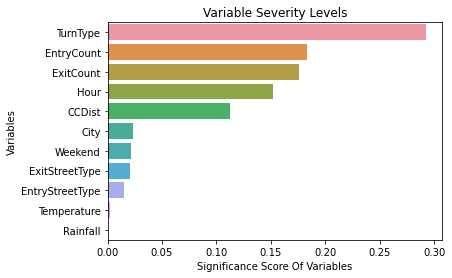

In [71]:
feature_imp = pd.Series(gb_tuned.estimators_[0].feature_importances_,
                        index=_df_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

## 8 Comparison of Final Models

In [72]:
print ('RF model : mse :', rf_mse, '- rmse :', rf_rmse) 
print ('GB model : mse :', gb_mse, '- rmse :', gb_rmse) 

RF model : mse : 4074.6433459881187 - rmse : 63.832933083073335
GB model : mse : 4986.399346970172 - rmse : 70.61444149018082


RF shows better rmse score than GB

## 9. Final Model Installation

### 9.1 Random Forest

In [ ]:
# predict test dataset
rf_pred = rf_tuned.predict(df_test_scaled)

In [ ]:
# create TargetId & Target as required by the competition 
rf_submission = pd.DataFrame (rf_pred, columns=range(0,6)).reset_index()
rf_submission = rf_submission.melt(id_vars='index', value_vars=range(0,6), value_name='Target')
rf_submission['TargetId'] = rf_submission['index'].astype(str) + '_' + rf_submission['variable'].astype(str)
rf_submission.sort_values(['index','variable'], inplace=True)

In [ ]:
rf_submission.shape

In [ ]:
sample = pd.read_csv("M6/sample_submission.csv")
sample.shape

In [ ]:
# The number of rows required in the submission file is slightly less - re-adjust the size of the submission file
rf_results = rf_submission.merge(sample[['TargetId']], on='TargetId', how='inner')
rf_results.shape

In [ ]:
rf_results[['TargetId','Target']].to_csv('rf_submission.csv', index=False)

### 9.2 Gradient Boosting 

In [ ]:
# predict test dataset
gb_pred = gb_tuned.predict(df_test_scaled)

In [ ]:
gb_submission = pd.DataFrame (gb_pred, columns=range(0,6)).reset_index()
gb_submission = gb_submission.melt(id_vars='index', value_vars=range(0,6), value_name='Target')
gb_submission['TargetId'] = gb_submission['index'].astype(str) + '_' + gb_submission['variable'].astype(str)
gb_submission.sort_values(['index','variable'], inplace=True)

In [ ]:
gb_submission.shape

In [ ]:
# The number of rows required in the submission file is slightly less - re-adjust the size of the submission file
gb_results = gb_submission.merge(sample[['TargetId']], on='TargetId', how='inner')
gb_results.shape

In [ ]:
gb_results[['TargetId','Target']].to_csv('gb_submission.csv', index=False)

## 10. Reporting

The aim of this study was to create regression models to predict traffic congestion in 4 major cities in th US. 
The work done is as follows:

1) Train & Test Data Set read.

2) With Exploratory Data Analysis; The data set's structural data were checked. The types of variables in the dataset were examined. Size information of the dataset was accessed. There are missing values in the data set  but that doesn't affect the modeling. Descriptive statistics of the data set were examined.

3) Data Preprocessing section; The outliers were determined  and X variables were standardized with the rubost method..

4) During Model Building; Linear Regression, KNN, Decision Tree, Random Forest & Grediant Boosting machine learning models were calculated. Later Random Forest  and Grediant Boosting hyperparameter optimizations optimized to increase accuracy level.

5) Result; The model created as a result of Random Forest hyperparameter optimization became the model with the lowest RMSE value. (63.8)

## 11. Final Remarks

Both RF & GB results were submitted in Kaggle competition. 
- RF submission got a score of 97.790061
- GB submission got a score of 82.170315